## Results

In [25]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scipy.stats as stats
from collections import Counter
from functools import reduce
from operator import add
import seaborn as sns

In [26]:
cell_test_list = ['cell_test_random', 'cell_test_no_move', 'cell_test_0.1_0.2', 'cell_test_0.1_0.3', 'cell_test_0.2_0.1', 'cell_test_0.3_0.1']
df_dict = {}

In [27]:
for cell_test in cell_test_list:
    df_dict[cell_test] = pd.read_csv(f'/Users/tanxiaoxuan/cell_env/{cell_test}/episodes/a_age.csv', header=None)
    df_dict[cell_test] = df_dict[cell_test].rename(columns={0: 'Iteration', 1: 'Global_concentration', 2: 'Local_concentration', 3: 'Age', 4: 'Agent_id', 5: 'Divided', 6: "Divided age", 7: "Deads", 8: "Deads age"})

    for i in range(1010):
        df_dict[cell_test].loc[i, 'Num_agents'] = len(df_dict[cell_test].loc[i, 'Agent_id'].split(" ")[1:])
        Divided_list = df_dict[cell_test].loc[i, 'Divided'].split(" ")[1:]
        if '' in Divided_list:
            Divided_list.remove('')
        df_dict[cell_test].loc[i, 'Num_divided'] = len(Divided_list)
        Dead_list = df_dict[cell_test].loc[i, 'Deads'].split(" ")[1:]
        if '' in Dead_list:
            Dead_list.remove('')
        df_dict[cell_test].loc[i, 'Num_dead'] = len(Dead_list)
        if i == 0:
            df_dict[cell_test].loc[i, 'Division_rate'] = 0
            df_dict[cell_test].loc[i, 'Death_rate'] = 0
        else:
            df_dict[cell_test].loc[i, 'Division_rate'] = df_dict[cell_test].loc[i, 'Num_divided'] / df_dict[cell_test].loc[i-1, 'Num_agents']
            df_dict[cell_test].loc[i, 'Death_rate'] = df_dict[cell_test].loc[i, 'Num_dead'] / df_dict[cell_test].loc[i-1, 'Num_agents']

In [28]:
episode_list = df_dict['cell_test_random'].index[df_dict['cell_test_random']['Iteration']==0].tolist()

### Global concentration of test episodes

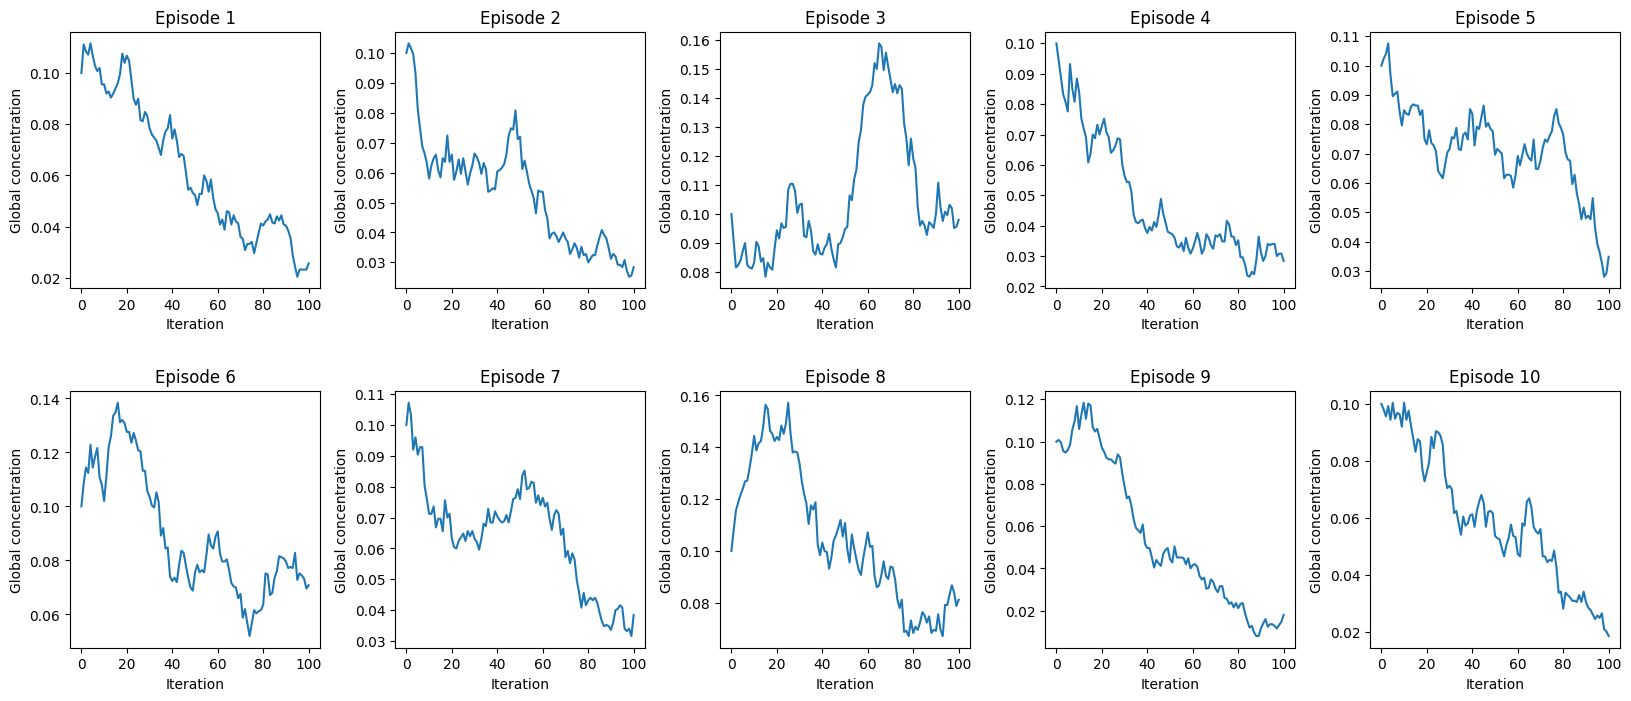

In [29]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(episode_list)):
    if i==len(episode_list)-1:
        iteration = df_dict['cell_test_random'][['Iteration']][episode_list[i]:]
        global_conc = df_dict['cell_test_random'][['Global_concentration']][episode_list[i]:]
    else:
        iteration = df_dict['cell_test_random'][['Iteration']][episode_list[i]:episode_list[i+1]]
        global_conc = df_dict['cell_test_random'][['Global_concentration']][episode_list[i]:episode_list[i+1]]
    plt.subplot(2, 5, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.plot(iteration, global_conc)
    plt.xlabel('Iteration')
    plt.ylabel('Global concentration')
    plt.title(f'Episode {i+1}')

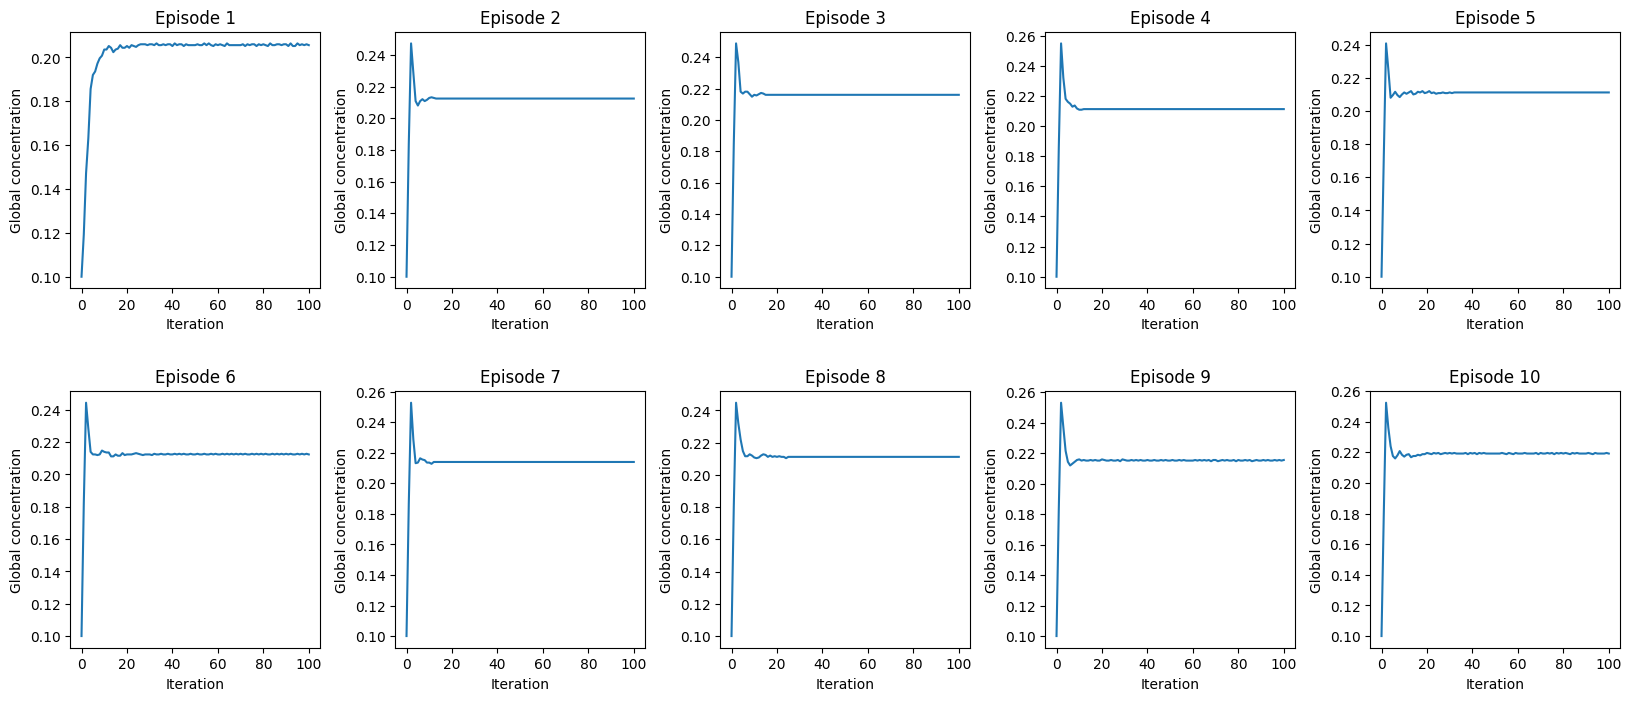

In [30]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(episode_list)):
    if i==len(episode_list)-1:
        iteration = df_dict['cell_test_no_move'][['Iteration']][episode_list[i]:]
        global_conc = df_dict['cell_test_no_move'][['Global_concentration']][episode_list[i]:]
    else:
        iteration = df_dict['cell_test_no_move'][['Iteration']][episode_list[i]:episode_list[i+1]]
        global_conc = df_dict['cell_test_no_move'][['Global_concentration']][episode_list[i]:episode_list[i+1]]
    plt.subplot(2, 5, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.plot(iteration, global_conc)
    plt.xlabel('Iteration')
    plt.ylabel('Global concentration')
    plt.title(f'Episode {i+1}')

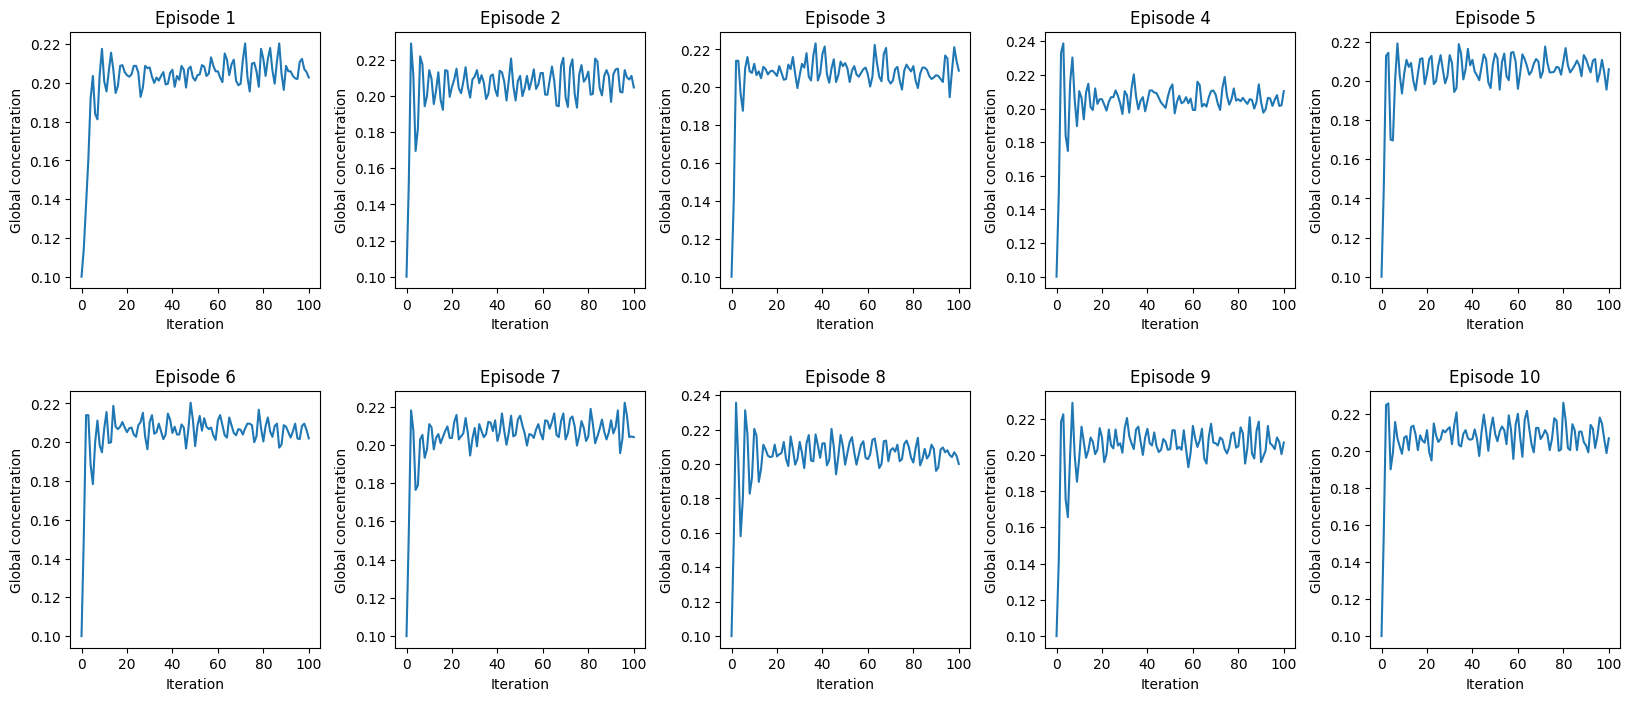

In [31]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(episode_list)):
    if i==len(episode_list)-1:
        iteration = df_dict['cell_test_0.1_0.2'][['Iteration']][episode_list[i]:]
        global_conc = df_dict['cell_test_0.1_0.2'][['Global_concentration']][episode_list[i]:]
    else:
        iteration = df_dict['cell_test_0.1_0.2'][['Iteration']][episode_list[i]:episode_list[i+1]]
        global_conc = df_dict['cell_test_0.1_0.2'][['Global_concentration']][episode_list[i]:episode_list[i+1]]
    plt.subplot(2, 5, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.plot(iteration, global_conc)
    plt.xlabel('Iteration')
    plt.ylabel('Global concentration')
    plt.title(f'Episode {i+1}')

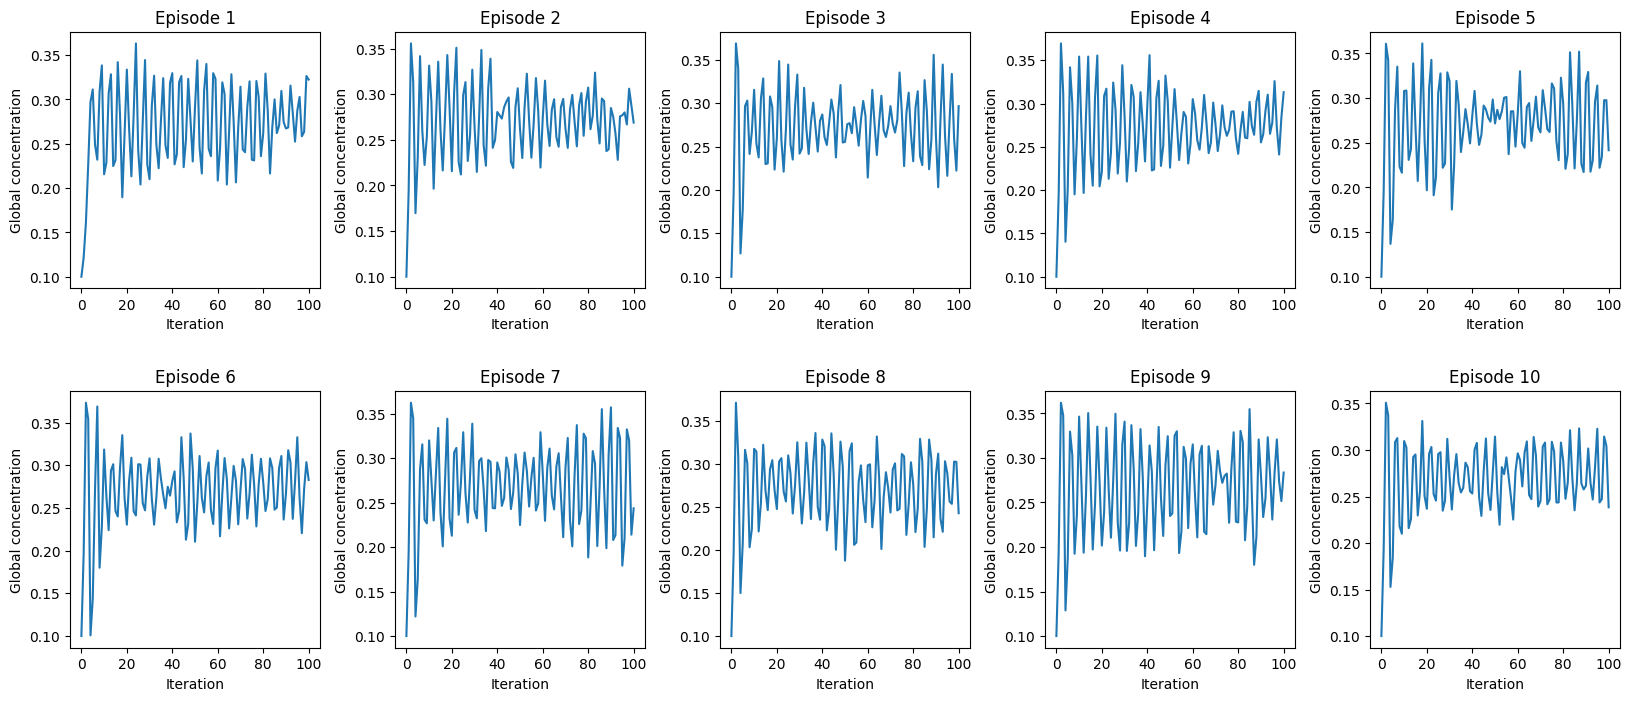

In [32]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(episode_list)):
    if i==len(episode_list)-1:
        iteration = df_dict['cell_test_0.1_0.3'][['Iteration']][episode_list[i]:]
        global_conc = df_dict['cell_test_0.1_0.3'][['Global_concentration']][episode_list[i]:]
    else:
        iteration = df_dict['cell_test_0.1_0.3'][['Iteration']][episode_list[i]:episode_list[i+1]]
        global_conc = df_dict['cell_test_0.1_0.3'][['Global_concentration']][episode_list[i]:episode_list[i+1]]
    plt.subplot(2, 5, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.plot(iteration, global_conc)
    plt.xlabel('Iteration')
    plt.ylabel('Global concentration')
    plt.title(f'Episode {i+1}')

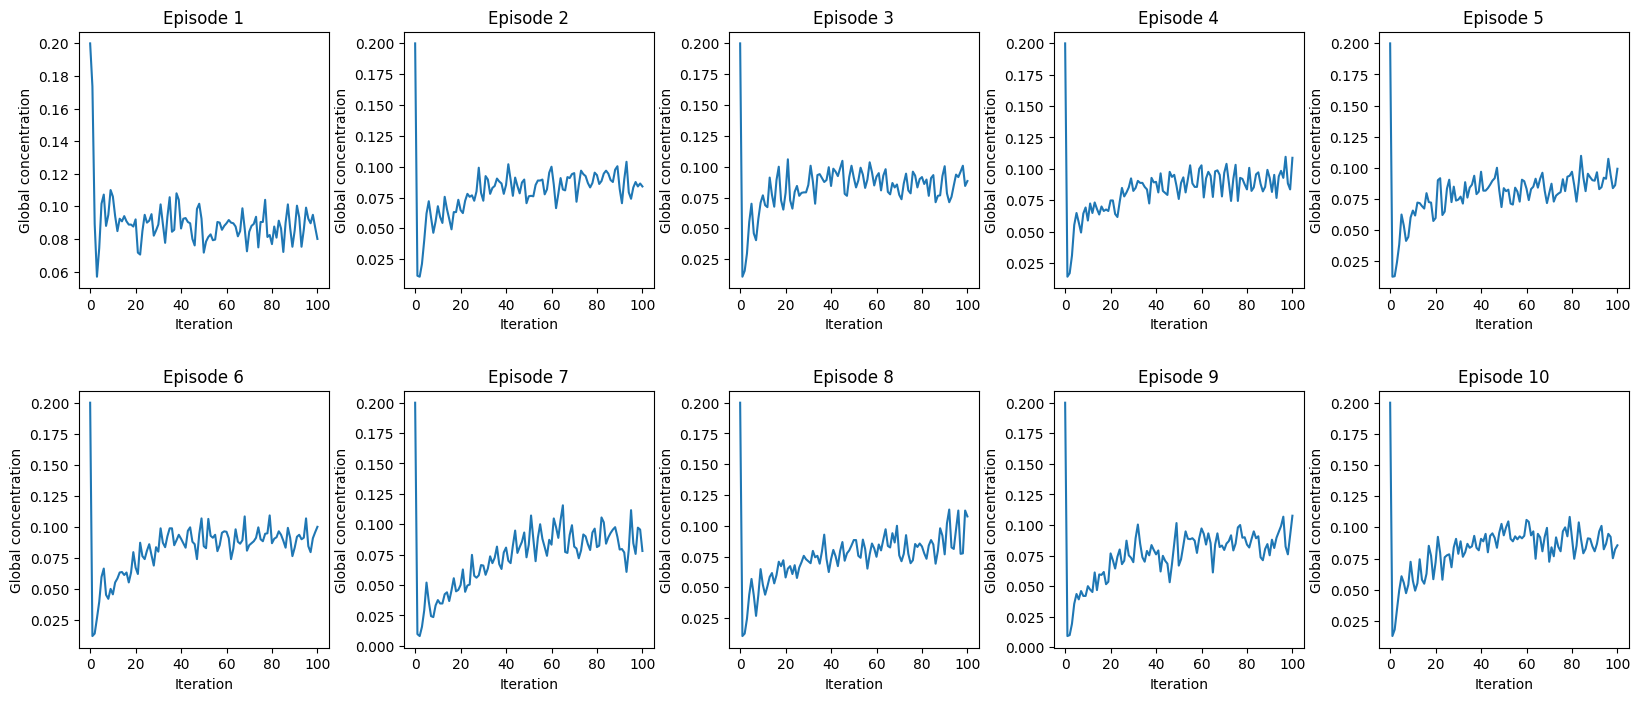

In [33]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(episode_list)):
    if i==len(episode_list)-1:
        iteration = df_dict['cell_test_0.2_0.1'][['Iteration']][episode_list[i]:]
        global_conc = df_dict['cell_test_0.2_0.1'][['Global_concentration']][episode_list[i]:]
    else:
        iteration = df_dict['cell_test_0.2_0.1'][['Iteration']][episode_list[i]:episode_list[i+1]]
        global_conc = df_dict['cell_test_0.2_0.1'][['Global_concentration']][episode_list[i]:episode_list[i+1]]
    plt.subplot(2, 5, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.plot(iteration, global_conc)
    plt.xlabel('Iteration')
    plt.ylabel('Global concentration')
    plt.title(f'Episode {i+1}')

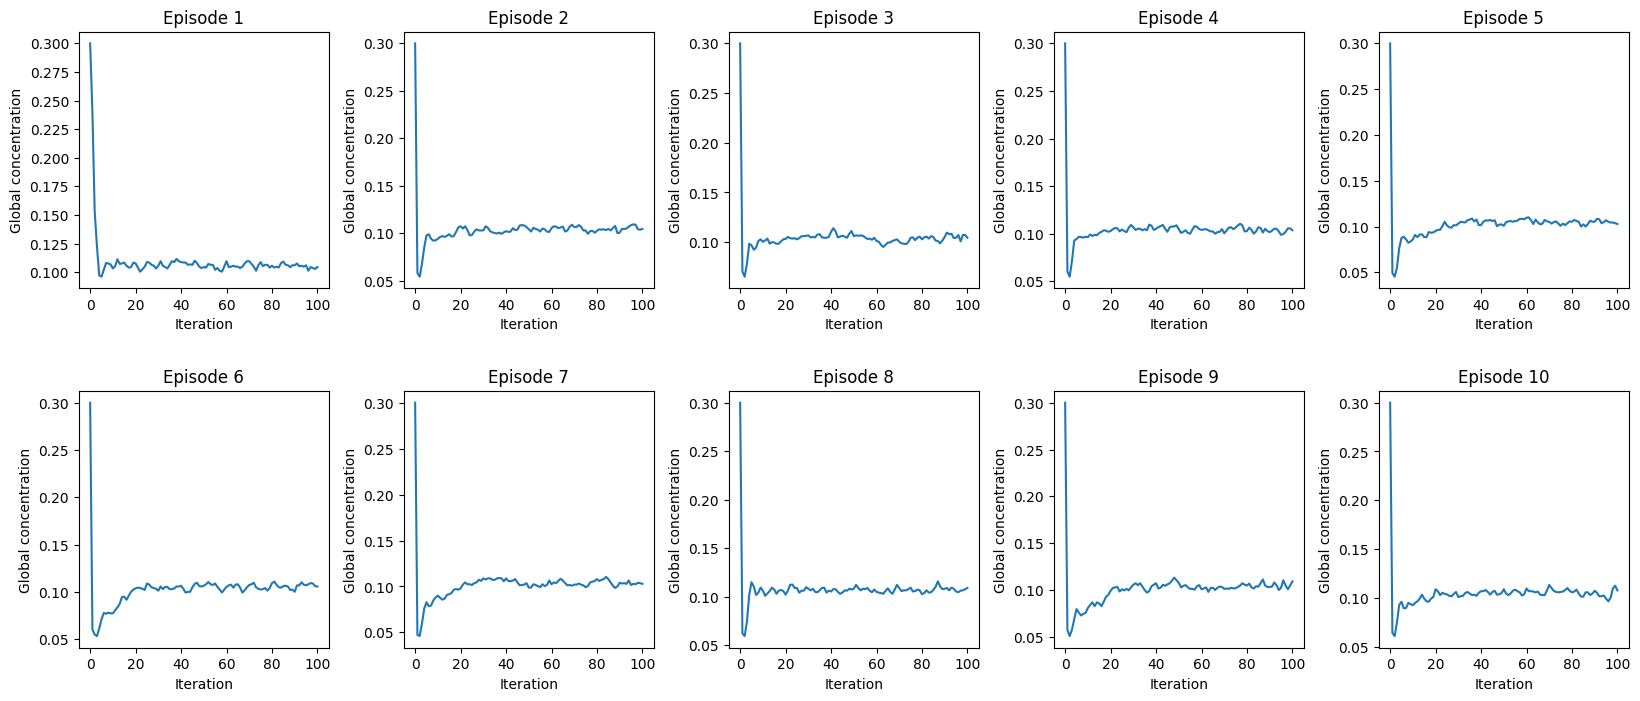

In [34]:
fig = plt.figure(figsize=(20, 8))
for i in range(len(episode_list)):
    if i==len(episode_list)-1:
        iteration = df_dict['cell_test_0.3_0.1'][['Iteration']][episode_list[i]:]
        global_conc = df_dict['cell_test_0.3_0.1'][['Global_concentration']][episode_list[i]:]
    else:
        iteration = df_dict['cell_test_0.3_0.1'][['Iteration']][episode_list[i]:episode_list[i+1]]
        global_conc = df_dict['cell_test_0.3_0.1'][['Global_concentration']][episode_list[i]:episode_list[i+1]]
    plt.subplot(2, 5, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.plot(iteration, global_conc)
    plt.xlabel('Iteration')
    plt.ylabel('Global concentration')
    plt.title(f'Episode {i+1}')

### Line graph of death rate and division rate

In [35]:
division_rates_dict = {}
death_rates_dict = {}

for cell_test in cell_test_list:
    division_rates = [df_dict[cell_test][episode_list[i]:episode_list[i+1]][['Division_rate']].reset_index(drop=True) if i<9 else df_dict[cell_test][episode_list[i]:][['Division_rate']].reset_index(drop=True) for i in range(10)]
    division_rates_dict[cell_test] = pd.concat(division_rates, axis=1)
    division_rates_dict[cell_test].loc[:, 'Mean'] = division_rates_dict[cell_test].iloc[:, 0:9].mean(axis=1)
    division_rates_dict[cell_test].loc[:, 'Std'] = division_rates_dict[cell_test].iloc[:, 0:9].std(axis=1)
    t_value = stats.t.ppf(0.975, 9)
    division_rates_dict[cell_test].loc[:, 'std_error'] = t_value * division_rates_dict[cell_test]['Std'] / np.sqrt(10)
    division_rates_dict[cell_test].loc[:, 'lower_CI'] = division_rates_dict[cell_test]['Mean'] - division_rates_dict[cell_test]['std_error']
    division_rates_dict[cell_test].loc[:, 'upper_CI'] = division_rates_dict[cell_test]['Mean'] + division_rates_dict[cell_test]['std_error']

    death_rates = [df_dict[cell_test][episode_list[i]:episode_list[i+1]][['Death_rate']].reset_index(drop=True) if i<9 else df_dict[cell_test][episode_list[i]:][['Death_rate']].reset_index(drop=True) for i in range(10)]
    death_rates_dict[cell_test] = pd.concat(death_rates, axis=1)
    death_rates_dict[cell_test].loc[:, 'Mean'] = death_rates_dict[cell_test].iloc[:, 0:9].mean(axis=1)
    death_rates_dict[cell_test].loc[:, 'Std'] = death_rates_dict[cell_test].iloc[:, 0:9].std(axis=1)
    t_value = stats.t.ppf(0.975, 9)
    death_rates_dict[cell_test].loc[:, 'std_error'] = t_value * death_rates_dict[cell_test]['Std'] / np.sqrt(10)
    death_rates_dict[cell_test].loc[:, 'lower_CI'] = death_rates_dict[cell_test]['Mean'] - death_rates_dict[cell_test]['std_error']
    death_rates_dict[cell_test].loc[:, 'upper_CI'] = death_rates_dict[cell_test]['Mean'] + death_rates_dict[cell_test]['std_error']

In [36]:
cell_test_names = ['Random', 'Init conc = 0.1, Target conc = 0.2 (No move)', 'Init conc = 0.1, Target conc = 0.2', 'Init conc = 0.1, Target conc = 0.3', 'Init conc = 0.2, Target conc = 0.1', 'Init conc = 0.3, Target conc = 0.1']

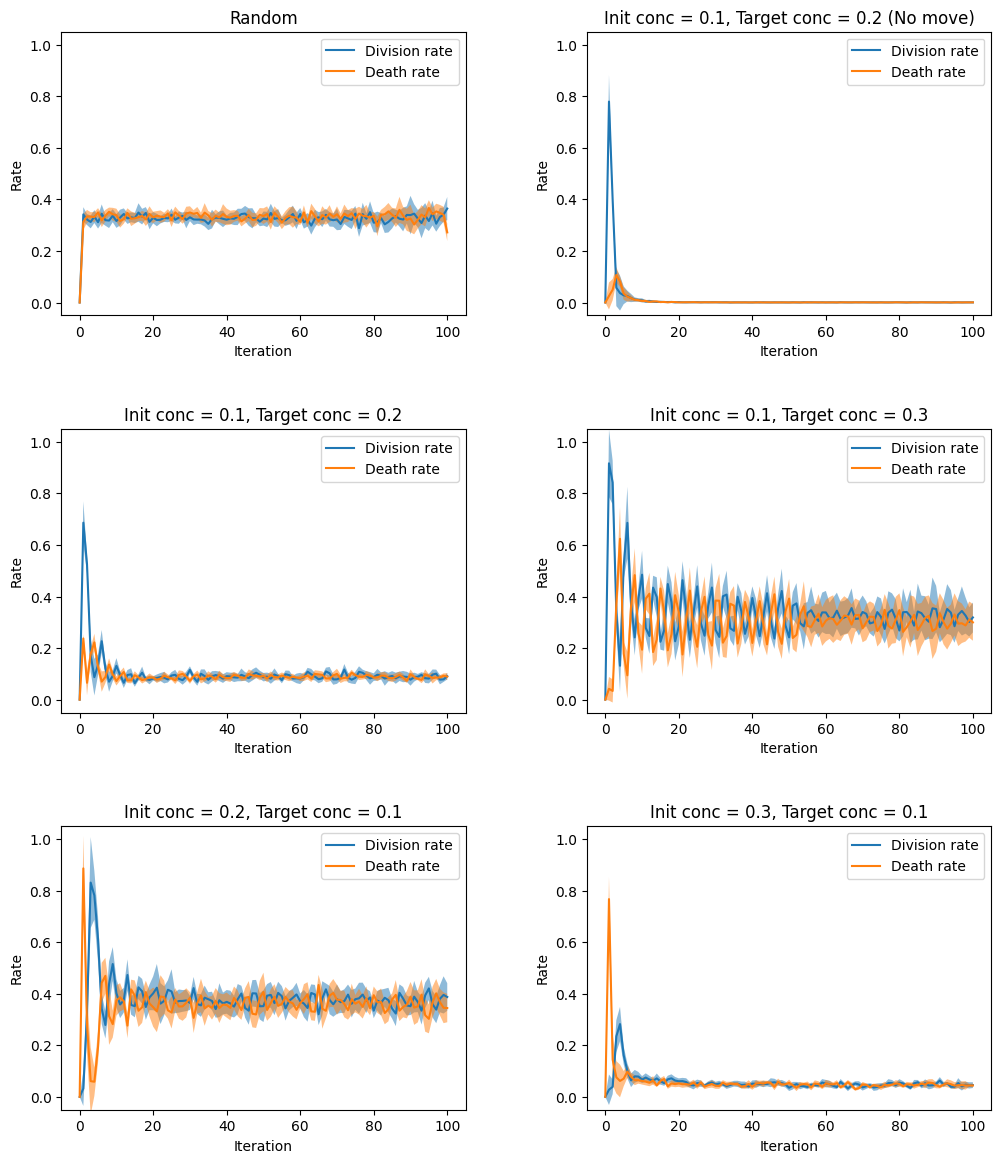

In [37]:
fig = plt.figure(figsize=(12, 14))
for i, cell_test in enumerate(cell_test_list):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.plot(division_rates_dict[cell_test][['Mean']], label='Division rate')
    plt.fill_between(division_rates_dict[cell_test].index.tolist(), division_rates_dict[cell_test]['lower_CI'], division_rates_dict[cell_test]['upper_CI'], alpha=0.5)
    plt.plot(death_rates_dict[cell_test][['Mean']], label='Death rate')
    plt.fill_between(death_rates_dict[cell_test].index.tolist(), death_rates_dict[cell_test]['lower_CI'], death_rates_dict[cell_test]['upper_CI'], alpha=0.5)
    plt.ylim(-0.05, 1.05)
    plt.title(cell_test_names[i])
    plt.xlabel("Iteration")
    plt.ylabel('Rate')
    plt.legend()
plt.show()

### Probability distribution of age groups conditional on actions

In [38]:
def to_list_int(x):
    divided_age_list = x.split(" ")[1:]
    if '' in divided_age_list:
        divided_age_list.remove('')
    divided_age_list = [int(divided_age) for divided_age in divided_age_list]
    return divided_age_list

def remove_zeros(a):
    filtered = [x for x in a if x>0]
    return filtered

In [39]:
divided_ages_dict = {}
death_ages_dict = {}
no_action_ages_dict = {}
for cell_test in cell_test_list:
    divided_ages = [df_dict[cell_test][episode_list[i]:episode_list[i+1]][['Divided age']].reset_index(drop=True) if i<9 else df_dict[cell_test][episode_list[i]:][['Divided age']].reset_index(drop=True) for i in range(10)]
    divided_ages_dict[cell_test] = pd.concat(divided_ages, axis=1).map(to_list_int)
    total_divided_ages_list = []
    for i in range(10):
        total_divided_ages = []
        for j in range(101):
            total_divided_ages.extend(divided_ages_dict[cell_test].iloc[j, i])
        total_divided_ages_list.append(total_divided_ages)
    divided_ages_dict[cell_test].loc[101] = total_divided_ages_list

    death_ages = [df_dict[cell_test][episode_list[i]:episode_list[i+1]][['Deads age']].reset_index(drop=True) if i<9 else df_dict[cell_test][episode_list[i]:][['Deads age']].reset_index(drop=True) for i in range(10)]
    death_ages_dict[cell_test] = pd.concat(death_ages, axis=1).map(to_list_int)
    total_death_ages_list = []
    for i in range(10):
        total_death_ages = []
        for j in range(101):
            total_death_ages.extend(death_ages_dict[cell_test].iloc[j, i])
        total_death_ages_list.append(total_death_ages)
    death_ages_dict[cell_test].loc[101] = total_death_ages_list

    no_action_ages = [df_dict[cell_test][episode_list[i]:episode_list[i+1]][['Age']].reset_index(drop=True) if i<9 else df_dict[cell_test][episode_list[i]:][['Age']].reset_index(drop=True) for i in range(10)]
    no_action_ages_dict[cell_test] = pd.concat(no_action_ages, axis=1).map(to_list_int).map(remove_zeros)
    total_no_action_ages_list = []
    for i in range(10):
        total_no_action_ages = []
        for j in range(101):
            total_no_action_ages.extend(no_action_ages_dict[cell_test].iloc[j, i])
        total_no_action_ages_list.append(total_no_action_ages)
    no_action_ages_dict[cell_test].loc[101] = total_no_action_ages_list

In [47]:
avg_divided_prob_dict = {}
avg_death_prob_dict = {}
avg_no_action_prob_dict = {}

for cell_test in cell_test_list:
    divided_prob_list = []
    death_prob_list = []
    no_action_prob_list = []
    for j in range(10):
        divided_ages = divided_ages_dict[cell_test].iloc[101, j]
        death_ages = death_ages_dict[cell_test].iloc[101, j]
        no_action_ages = no_action_ages_dict[cell_test].iloc[101, j]

        divided_counts = Counter(divided_ages)
        death_counts = Counter(death_ages)
        no_action_counts = Counter(no_action_ages)

        divided_prob = {age: count / len(divided_ages) for age, count in divided_counts.items()}
        death_prob = {age: count / len(death_ages) for age, count in death_counts.items()}
        no_action_prob = {age: count / len(no_action_ages) for age, count in no_action_counts.items()}

        for i in range(1, 11):
            if i not in divided_prob.keys():
                divided_prob[i] = 0
            if i not in death_prob.keys():
                death_prob[i] = 0
            if i not in no_action_prob.keys():
                no_action_prob[i] = 0

        divided_prob[10] = sum([prob for age, prob in divided_prob.items() if age>9])
        death_prob[10] = sum([prob for age, prob in death_prob.items() if age>9])
        no_action_prob[10] = sum([prob for age, prob in no_action_prob.items() if age>9])

        divided_prob = {age: prob for age, prob in divided_prob.items() if age<=10}
        death_prob = {age: prob for age, prob in death_prob.items() if age<=10}
        no_action_prob = {age: prob for age, prob in no_action_prob.items() if age<=10}

        divided_prob_list.append(divided_prob)
        death_prob_list.append(death_prob)
        no_action_prob_list.append(no_action_prob)
    
    sum_divided_prob = dict(reduce(add, map(Counter, divided_prob_list)))
    sum_death_prob = dict(reduce(add, map(Counter, divided_prob_list)))
    sum_no_action_prob = dict(reduce(add, map(Counter, no_action_prob_list)))

    avg_divided_prob = {age: prob/10 for age, prob in sum_divided_prob.items()}
    avg_death_prob = {age: prob/10 for age, prob in sum_death_prob.items()}
    avg_no_action_prob = {age: prob/10 for age, prob in sum_no_action_prob.items()}

    avg_divided_prob = {key:avg_divided_prob[key] for key in sorted(avg_divided_prob.keys())}
    avg_death_prob = {key:avg_death_prob[key] for key in sorted(avg_death_prob.keys())}
    avg_no_action_prob = {key:avg_no_action_prob[key] for key in sorted(avg_no_action_prob.keys())}

    avg_divided_prob_dict[cell_test] = avg_divided_prob
    avg_death_prob_dict[cell_test] = avg_death_prob
    avg_no_action_prob_dict[cell_test] = avg_no_action_prob

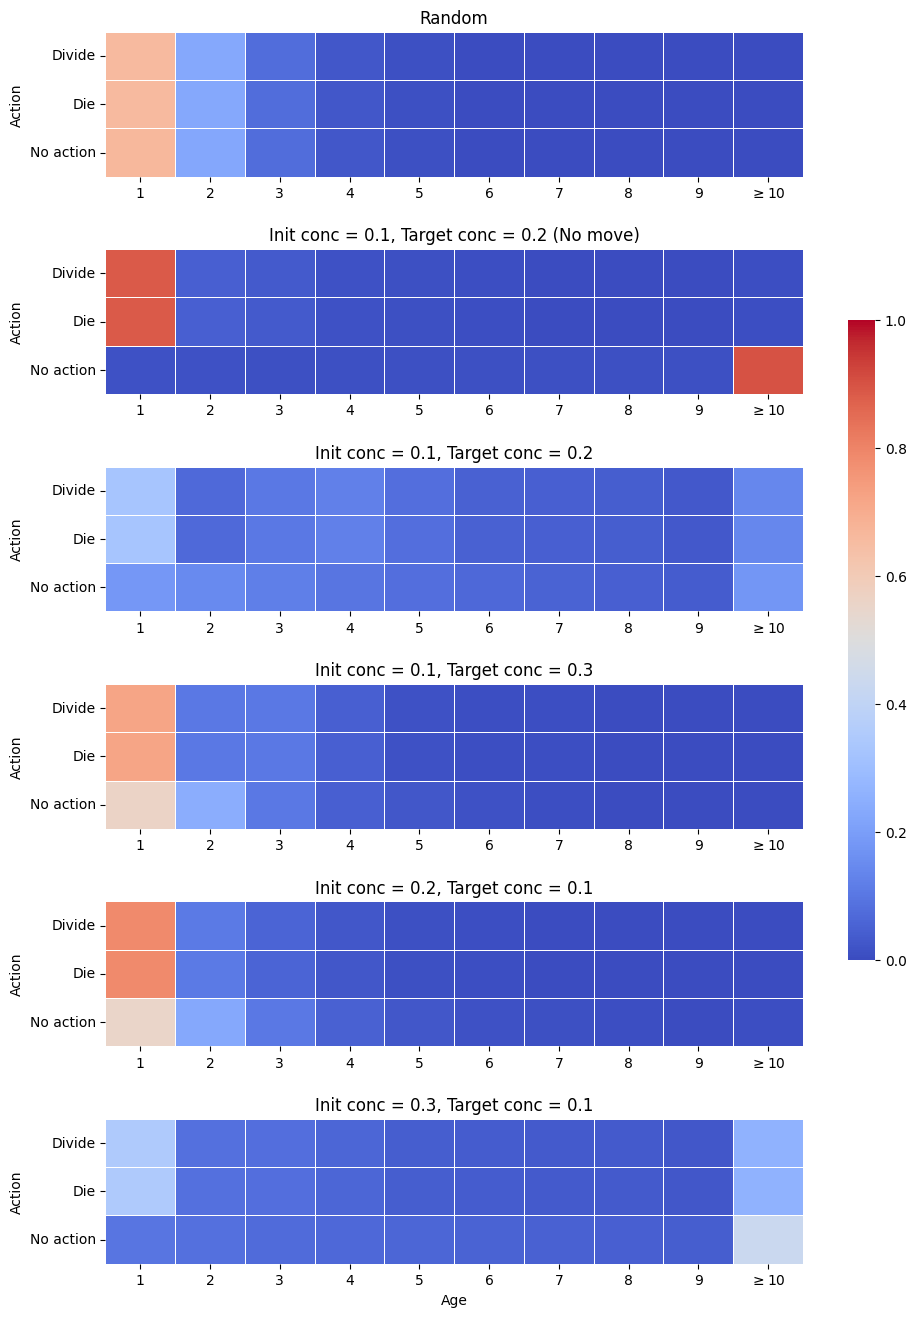

In [48]:
fig = plt.figure(figsize=(9, 16))
cbar_ax = fig.add_axes([.95, .3, .03, .4])
for i, cell_test in enumerate(cell_test_list):
    plt.subplot(6, 1, i+1)
    plt.subplots_adjust(hspace=0.5)
    df_prob = pd.DataFrame.from_dict(avg_divided_prob_dict[cell_test], orient='index').T
    df_prob.loc[1] = avg_death_prob_dict[cell_test]
    df_prob.loc[2] = avg_no_action_prob_dict[cell_test]
    df_prob = df_prob.rename(index={0:'Divide', 1:'Die', 2:'No action'}, columns={10:r'$\geq10$'})  
    sns.heatmap(df_prob, linewidth=0.5, vmin=0, vmax=1, cmap="coolwarm", cbar=i==0, cbar_ax=None if i else cbar_ax)  
    plt.title(cell_test_names[i])
    plt.yticks(rotation=0) 
    plt.ylabel('Action')
    if i==5:
        plt.xlabel('Age')
plt.show()